<h1>Problem statement</h1>

Operating room (OR) inefficiency is a significant financial burden on healthcare organizations, impacting both cost and patient care. While booked OR time represents a planned utilization metric, it often deviates from the actual time procedures take due to workflow delays, inaccurate booking estimates, and cancellations.

The aim of this project is to leverage a dataset containing surgical timestamps throughout the OR workflow to identify and quantify these areas of inefficiency.

By analyzing this data, we can develop actionable insights to optimize OR utilization, potentially saving healthcare organizations substantial time and financial resources, and ultimately improving patient care delivery.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Operating_room_utilization_dataset.csv")
df.head()

,index,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
0,0,10001,01/03/22,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,01/03/22 07:00 AM,01/03/22 07:05 AM,01/03/22 07:32 AM,01/03/22 09:05 AM,01/03/22 09:17 AM
1,1,10002,01/03/22,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,01/03/22 08:45 AM,01/03/22 09:48 AM,01/03/22 10:13 AM,01/03/22 11:01 AM,01/03/22 11:12 AM
2,2,10003,01/03/22,1,Podiatry,28297,Lapidus bunionectomy,150,01/03/22 10:00 AM,01/03/22 11:50 AM,01/03/22 12:20 PM,01/03/22 12:42 PM,01/03/22 12:58 PM
3,3,10004,01/03/22,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,01/03/22 12:45 PM,01/03/22 01:29 PM,01/03/22 01:53 PM,01/03/22 02:50 PM,01/03/22 03:02 PM
4,4,10005,01/03/22,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,01/03/22 07:00 AM,01/03/22 07:15 AM,01/03/22 07:50 AM,01/03/22 09:38 AM,01/03/22 09:51 AM


<h2>Dataset description:</h2>

**Columns Name : Description**

Date : The date of the surgery.

OR Suite : The operating room where the surgery will take place.

Service: The surgical specialty.

CPT Code: The code for the surgical procedure.

CPT Description: A description of the surgical procedure.

Booked Time (min): The amount of time that was booked for the surgery.

OR Schedule: The time that the surgery was scheduled to start.

Wheels In: The time that the patient arrived in the operating room.

Start Time: The time that the surgery started.

End Time: The time that the surgery ended.

Wheels Out: The time that the patient left the operating room.

In [3]:
print('Data SHAPE:',df.shape)
print(f'Number of OBSERVATIONS : {df.shape[0]}')
print(f'Number of FEATURES : {df.shape[1]}')

Data SHAPE: (2172, 13)
Number of OBSERVATIONS : 2172
Number of FEATURES : 13


In [4]:
print('Summary of the Dataset:-')
print("\n")
df.info()

Summary of the Dataset:-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2172 non-null   int64 
 1   Encounter ID       2172 non-null   int64 
 2   Date               2172 non-null   object
 3   OR Suite           2172 non-null   int64 
 4   Service            2172 non-null   object
 5   CPT Code           2172 non-null   int64 
 6   CPT Description    2172 non-null   object
 7   Booked Time (min)  2172 non-null   int64 
 8   OR Schedule        2172 non-null   object
 9   Wheels In          2172 non-null   object
 10  Start Time         2172 non-null   object
 11  End Time           2172 non-null   object
 12  Wheels Out         2172 non-null   object
dtypes: int64(5), object(8)
memory usage: 220.7+ KB


In [5]:
print(f'Total number Elements in Dataset: {df.size}')

Total number Elements in Dataset: 28236


In [6]:
print("The data types of the columns consists:")
df.dtypes

The data types of the columns consists:


index                 int64
Encounter ID          int64
Date                 object
OR Suite              int64
Service              object
CPT Code              int64
CPT Description      object
Booked Time (min)     int64
OR Schedule          object
Wheels In            object
Start Time           object
End Time             object
Wheels Out           object
dtype: object

In [7]:
df.drop(columns={"index"}, inplace=True)

In [8]:
df.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out'],
      dtype='object')

In [9]:
print("The null values are in the Data set:")
df.isna().sum()

The null values are in the Data set:


Encounter ID         0
Date                 0
OR Suite             0
Service              0
CPT Code             0
CPT Description      0
Booked Time (min)    0
OR Schedule          0
Wheels In            0
Start Time           0
End Time             0
Wheels Out           0
dtype: int64

In [10]:
print("The Duplicates values are in the Data set:")
df.duplicated().sum()

The Duplicates values are in the Data set:


0

In [11]:
df.describe()

,Encounter ID,OR Suite,CPT Code,Booked Time (min)
count,2172.000000,2172.000000,2172.000000,2172.000000
mean,11086.500000,4.288674,44881.405617,77.189227
std,627.146713,2.163514,18087.419079,30.430015
min,10001.000000,1.000000,14060.000000,30.000000
25%,10543.750000,3.000000,28296.000000,60.000000
50%,11086.500000,4.000000,42826.000000,60.000000
75%,11629.250000,6.000000,66982.000000,90.000000
max,12172.000000,8.000000,69436.000000,180.000000


<h4> This is the decription od the data set we having, says that, the coun of the rows we are having is the 2172 rows the standard and statistical analysis of all the columns. </h4>

In [12]:
df.describe(include="object")

,Date,Service,CPT Description,OR Schedule,Wheels In,Start Time,End Time,Wheels Out
count,2172,2172,2172,2172,2172,2172,2172,2172
unique,62,10,32,981,1982,2000,2047,2100
top,03/07/22,Ophthalmology,Extracapsular cataract removal,02/11/22 07:00 AM,02/11/22 07:03 AM,02/07/22 07:28 AM,01/27/22 11:40 AM,01/10/22 08:18 AM
freq,42,334,334,9,3,4,4,2


In [13]:
for i in df.columns:
    print(f'Number of Unique values in "{i}" is {df[i].nunique()}')

Number of Unique values in "Encounter ID" is 2172
Number of Unique values in "Date" is 62
Number of Unique values in "OR Suite" is 8
Number of Unique values in "Service" is 10
Number of Unique values in "CPT Code" is 32
Number of Unique values in "CPT Description" is 32
Number of Unique values in "Booked Time (min)" is 8
Number of Unique values in "OR Schedule" is 981
Number of Unique values in "Wheels In" is 1982
Number of Unique values in "Start Time" is 2000
Number of Unique values in "End Time" is 2047
Number of Unique values in "Wheels Out" is 2100


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['OR Schedule'] = pd.to_datetime(df['OR Schedule'], format='%m/%d/%y %I:%M %p')
df['Wheels In'] = pd.to_datetime(df['Wheels In'], format='%m/%d/%y %I:%M %p')
df['Wheels Out'] = pd.to_datetime(df['Wheels Out'], format='%m/%d/%y %I:%M %p')
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%y %I:%M %p')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%y %I:%M %p')

# Visuals Analysis

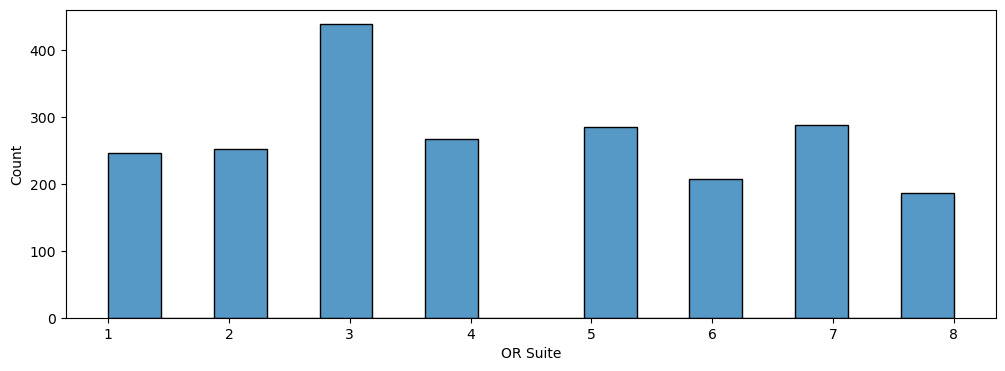

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(df['OR Suite'])
plt.show()

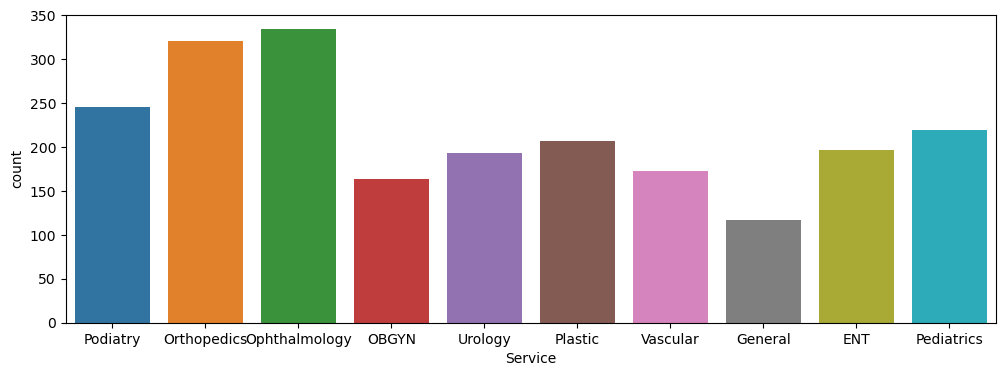

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data = df , x = df['Service'])
plt.show()

The analysis reveals the distribution of surgical procedures across various specialties. Here's a breakdown of the number of procedures conducted in each specialty:

- **Ophthalmology**: 334 procedures
- **Orthopedics**: 321 procedures
- **Podiatry**: 246 procedures
- **Pediatrics**: 220 procedures
- **Plastic Surgery**: 207 procedures
- **Ear, Nose, and Throat (ENT)**: 197 procedures
- **Urology**: 193 procedures
- **Vascular Surgery**: 173 procedures
- **Obstetrics and Gynecology (OBGYN)**: 164 procedures
- **General Surgery**: 117 procedures

From this analysis, it's evident that Ophthalmology and Orthopedics are the most frequently performed procedures, followed closely by Podiatry. Pediatric, Plastic, and ENT surgeries also show significant activity. Conversely, General Surgery has the fewest number of procedures among the specialties listed.

This information provides valuable insights into the workload distribution across different surgical specialties, which can aid in resource allocation, scheduling, and overall operational planning within a healthcare facility.

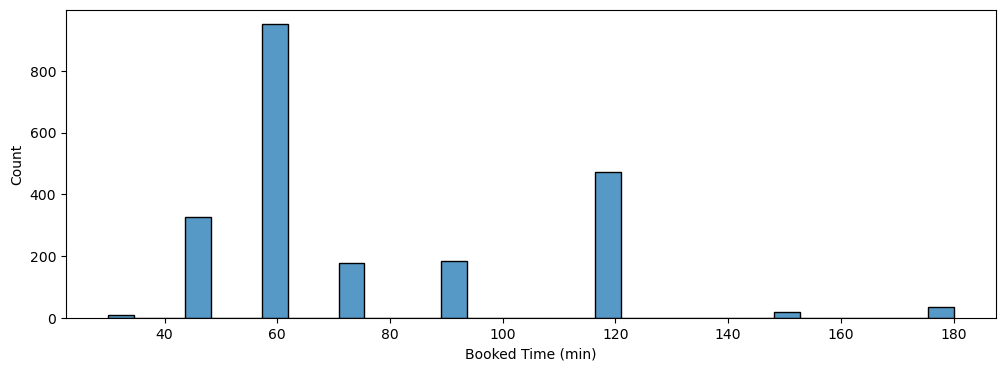

In [18]:
plt.figure(figsize=(12,4))
sns.histplot(df['Booked Time (min)'])
plt.show()

The analysis reveals a distribution of booked time durations for surgical procedures, ranging from as short as 30 minutes to as long as 180 minutes. Here's a breakdown of the frequency of each duration:

- **60 minutes**: The most common booked duration, occurring 951 times.
- **120 minutes**: The second most common duration, with 473 occurrences.
- **45 minutes**: Booked for procedures 326 times, indicating a significant frequency but less common than 60 or 120 minutes.
- **90 minutes**: Occurring 183 times, indicating moderate frequency.
- **75 minutes**: Booked for 177 procedures, showing a slightly lower frequency than 90 minutes.
- **180 minutes**: The longest booked duration in this dataset, appearing only 36 times.
- **150 minutes**: Booked for 18 procedures, showing relatively rare occurrence.
- **30 minutes**: The shortest booked duration, seen in only 8 instances.

This analysis provides insights into the distribution of booked times for surgical procedures, helping to understand the typical duration expectations and the frequency of different time slots booked by the hospital or scheduling system.

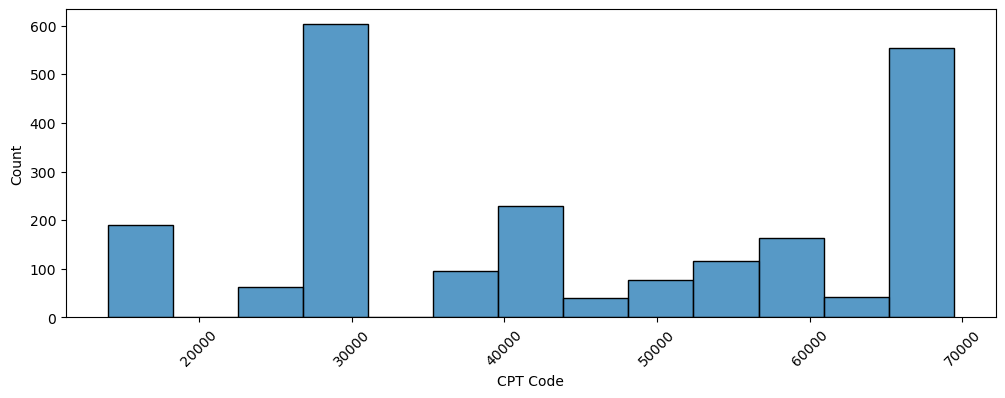

In [19]:
plt.figure(figsize=(12,4))
sns.histplot(df['CPT Code'])
plt.xticks(rotation = 45);

In [20]:
df.groupby("CPT Code").size()

CPT Code
14060     86
15773     36
17110     69
26045     21
26356     20
26735     21
27130     23
27445     82
28055     18
28060     42
28110     18
28285     42
28289     23
28296     85
28297     18
28820     78
29877    112
30400     16
30520     46
36901     95
42826    151
43775     78
47562     39
52353     76
55250     78
55873     39
57460     82
58562     82
64721     42
66982    334
69421     88
69436    132
dtype: int64

### Distribution of the data:

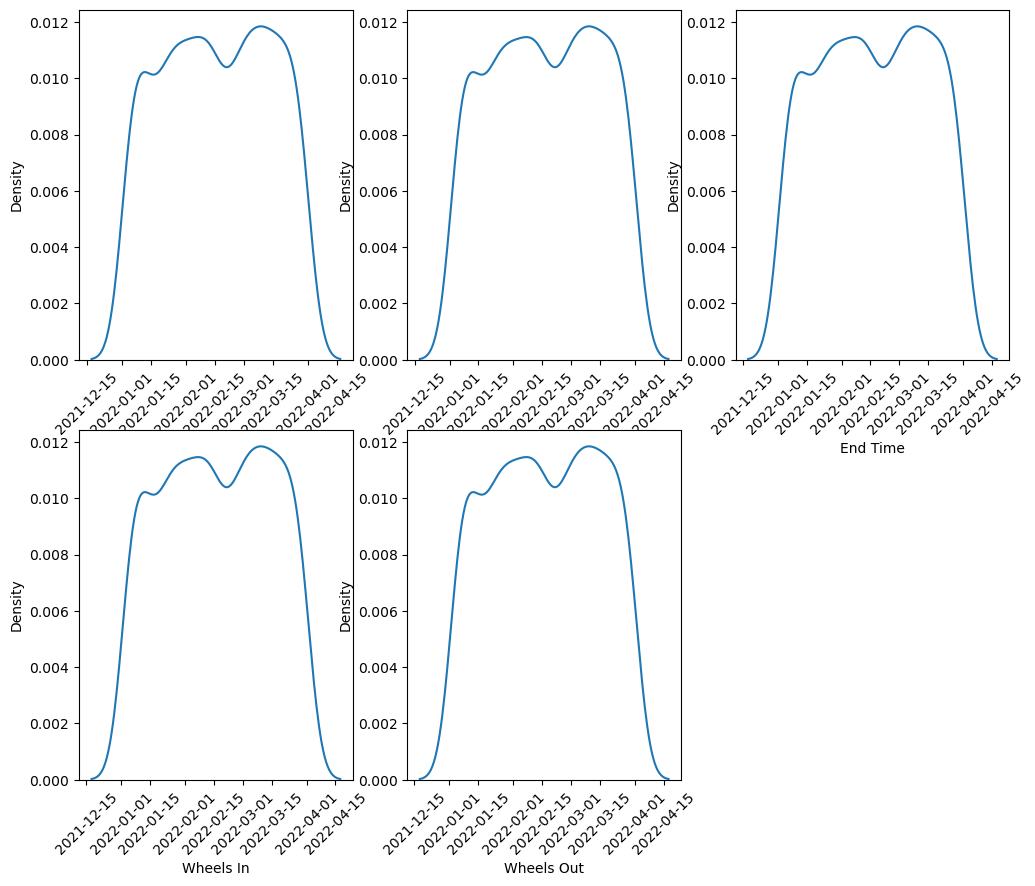

In [21]:
plt.figure(figsize= (12,10))
plt.subplot(231)
sns.kdeplot(df['Date'])
plt.xticks(rotation = 45)

plt.subplot(232)
sns.kdeplot(df['Start Time'])
plt.xticks(rotation = 45)

plt.subplot(233)
sns.kdeplot(df['End Time'])
plt.xticks(rotation = 45)

plt.subplot(234)
sns.kdeplot(df['Wheels In'])
plt.xticks(rotation = 45)

plt.subplot(235)
sns.kdeplot(df['Wheels Out'])
plt.xticks(rotation = 45);

## Bi-Variate Analysis

<Figure size 1500x1200 with 0 Axes>

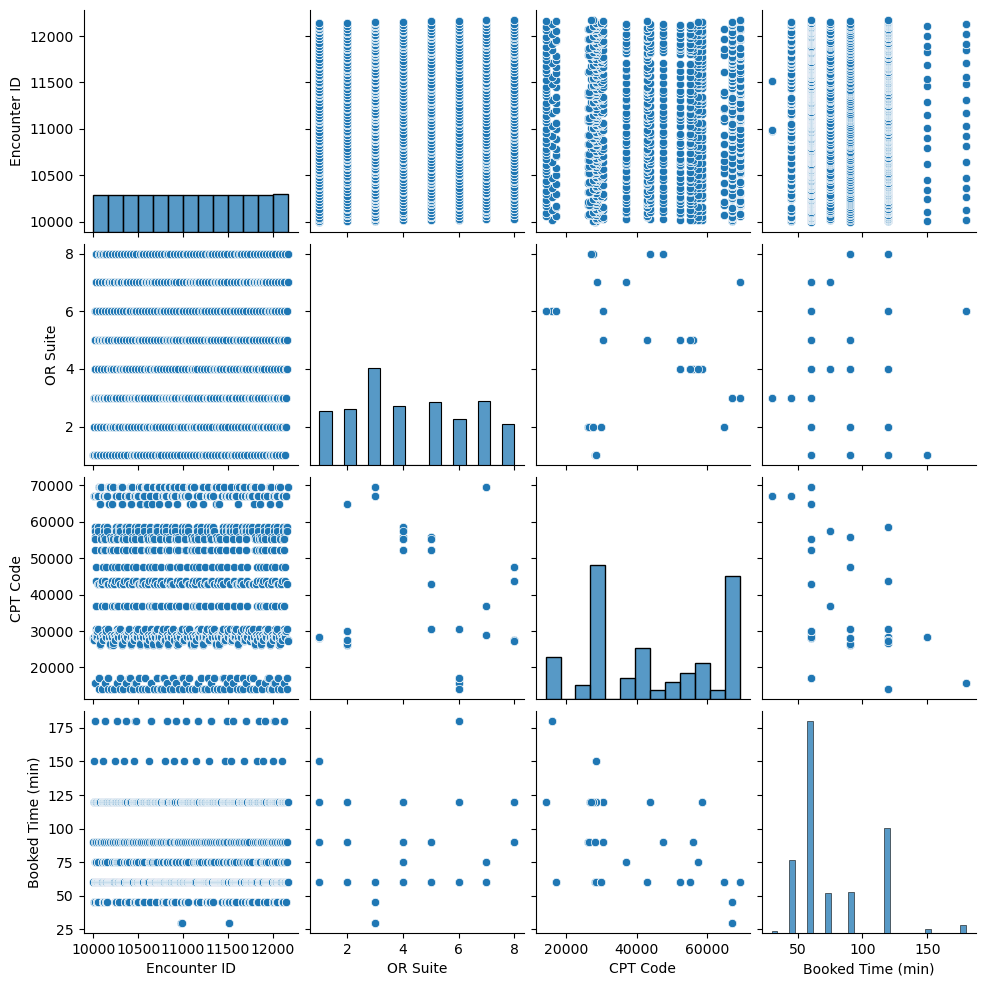

In [22]:
plt.figure(figsize= (15,12))
sns.pairplot(df)
plt.show()

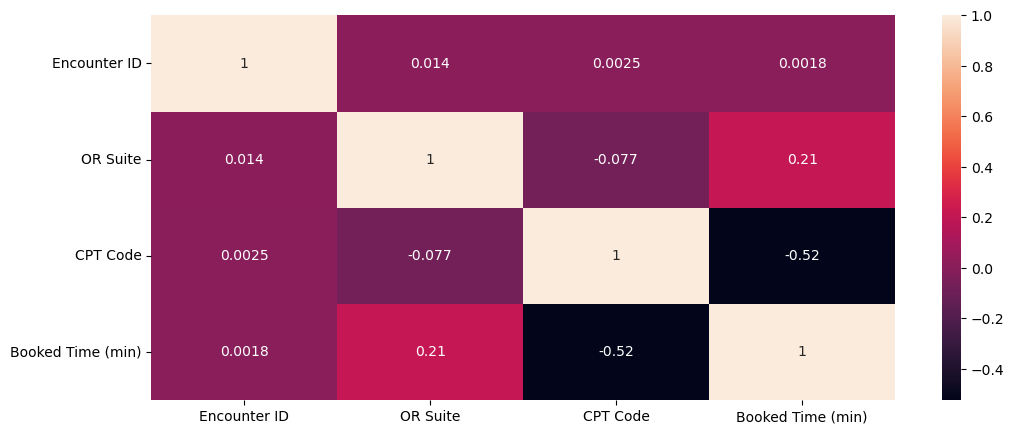

In [23]:
plt.figure(figsize = (12,5))
df_corr1 = df.drop(['CPT Description', 'Service'], axis=1).corr()
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df_corr1, annot=True)
plt.show()

The provided correlation matrix displays the relationships between different variables in the dataset. Here's a detailed description of the correlations:

- **Encounter ID**:
  - Weak positive correlation with 'OR Suite' (0.014121) and 'CPT Code' (0.002475), indicating minimal association.
  - Nearly negligible correlation with 'Booked Time (min)' (0.001786), suggesting little to no relationship.

- **OR Suite**:
  - Weak positive correlation with 'Encounter ID' (0.014121), indicating a slight association.
  - Negative correlation with 'CPT Code' (-0.077495), suggesting a weak inverse relationship.
  - Moderate positive correlation with 'Booked Time (min)' (0.212044), indicating a tendency for longer booked times in certain OR suites.

- **CPT Code**:
  - Weak positive correlation with 'Encounter ID' (0.002475), suggesting minimal association.
  - Negative correlation with 'OR Suite' (-0.077495), indicating a weak inverse relationship.
  - Moderate negative correlation with 'Booked Time (min)' (-0.524133), suggesting that certain CPT codes are associated with shorter booked times.

- **Booked Time (min)**:
  - Weak positive correlation with 'Encounter ID' (0.001786), indicating minimal association.
  - Moderate positive correlation with 'OR Suite' (0.212044), suggesting that certain OR suites tend to have longer booked times.
  - Moderate negative correlation with 'CPT Code' (-0.524133), indicating that specific procedures (CPT codes) are associated with shorter booked times.

# Let's analyse the Basics Calculations

## Identifying Workﬂow Delays:

### Calculate Actual Duration

In [24]:
df['Actual Duration (min)'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60

### Calculate Total OR Time

In [25]:
df['Total OR Time (min)'] = (df['Wheels Out'] - df['Wheels In']).dt.total_seconds() / 60

### Calculate Delay

In [26]:
df['Delay (min)'] = (df['Start Time'] - df['OR Schedule']).dt.total_seconds() / 60

### Calculating Delay in OR After Operation

In [27]:
df['OR Exit(min)'] = (df['Wheels Out'] - df['End Time']).dt.total_seconds() / 60

### Calculating the Delay in Enter in OR and Start

In [28]:
df['OR Enter(min)'] = (df['Start Time'] - df['Wheels In']).dt.total_seconds()/60

# Filtering and Segmentation

In [29]:
start_date = df['Date'].min()
end_date = df['Date'].max()

In [30]:
print(start_date)
print(end_date)

2022-01-03 00:00:00
2022-03-31 00:00:00


### Filter by date range

In [31]:
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print("Filtered by Date Range:")
df[:4]

Filtered by Date Range:


,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out,Actual Duration (min),Total OR Time (min),Delay (min),OR Exit(min),OR Enter(min)
0,10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,2022-01-03 09:05:00,2022-01-03 09:17:00,93.0,132.0,32.0,12.0,27.0
1,10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,2022-01-03 11:01:00,2022-01-03 11:12:00,48.0,84.0,88.0,11.0,25.0
2,10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,2022-01-03 12:42:00,2022-01-03 12:58:00,22.0,68.0,140.0,16.0,30.0
3,10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,2022-01-03 14:50:00,2022-01-03 15:02:00,57.0,93.0,68.0,12.0,24.0


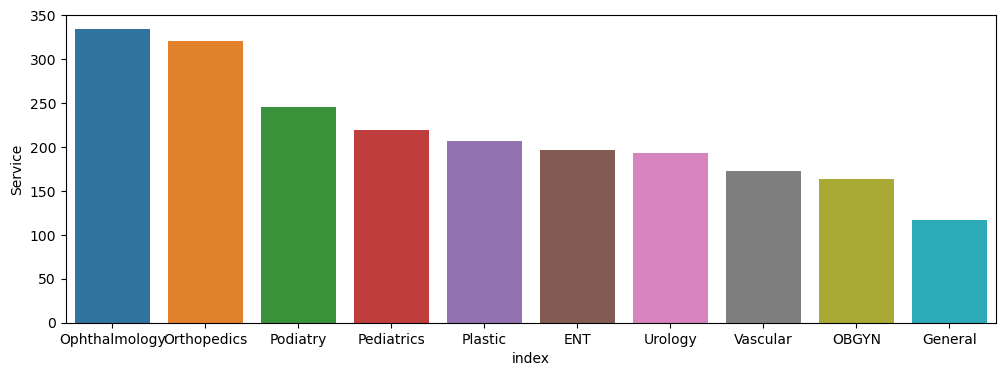

In [32]:
services = df['Service'].value_counts().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(data=services, x="index", y="Service")
plt.show()

The analysis presents the distribution of surgical procedures across various specialties, highlighting the frequency of each specialty in the dataset. Here's a detailed description:

- **Ophthalmology**: Represents the most frequent specialty in the dataset, with 334 occurrences, indicating a substantial volume of ophthalmologic procedures scheduled.
- **Orthopedics**: Follows closely behind ophthalmology with 321 occurrences, suggesting a comparable frequency of orthopedic surgeries.
- **Podiatry**: Shows a significant presence with 246 occurrences, indicating a notable demand for podiatric procedures.
- **Pediatrics**: Appears with 220 occurrences, indicating a considerable volume of pediatric surgeries scheduled.
- **Plastic Surgery**: Present with 207 occurrences, suggesting a substantial demand for plastic surgical interventions.
- **Ear, Nose, and Throat (ENT)**: Represents a frequent specialty with 197 occurrences, indicating a significant volume of ENT procedures.
- **Urology**: Appears with 193 occurrences, suggesting a notable demand for urological surgeries.
- **Vascular Surgery**: Seen with 173 occurrences, indicating a substantial volume of vascular surgical interventions.
- **Obstetrics and Gynecology (OBGYN)**: Shows 164 occurrences, suggesting a significant presence of obstetric and gynecological procedures.
- **General Surgery**: Present with 117 occurrences, indicating a moderate volume of general surgical procedures.

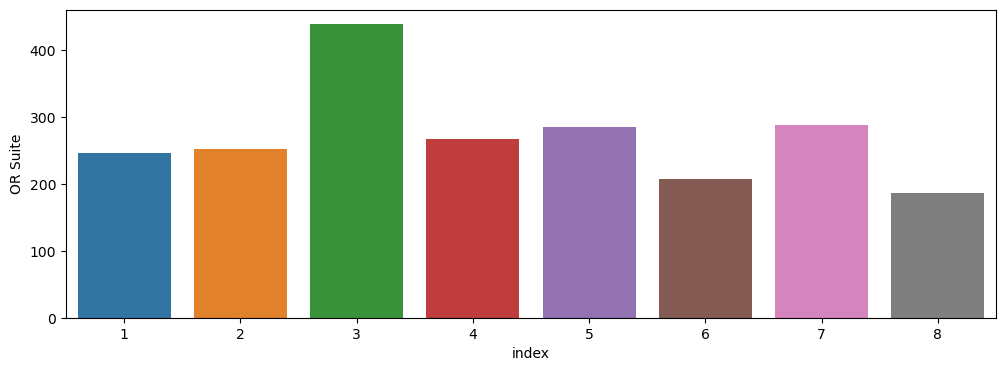

In [33]:
suite = df['OR Suite'].value_counts().reset_index()
plt.figure(figsize=(12,4))
sns.barplot(data=suite,x="index", y="OR Suite")
plt.show()

The analysis presents the distribution of surgical procedures based on their assigned priority levels, with priority levels ranging from 1 to 8. Here's a breakdown of the frequency of each priority level:

- **Priority Level 3**: This level has the highest frequency, with procedures assigned this priority occurring 439 times.
- **Priority Level 7**: Following closely behind, procedures with a priority level of 7 occur 288 times.
- **Priority Level 5**: Almost on par with priority level 7, procedures with priority level 5 appear 286 times.
- **Priority Level 4**: Slightly less frequent than priority levels 3, 5, and 7, procedures with priority level 4 are observed 268 times.
- **Priority Level 2**: With 252 occurrences, procedures with priority level 2 are relatively common.
- **Priority Level 1**: Close in frequency to level 2, procedures with priority level 1 are observed 246 times.
- **Priority Level 6**: This level is less common than the levels above it, with procedures assigned priority level 6 occurring 207 times.
- **Priority Level 8**: The least frequent priority level in the dataset, procedures with priority level 8 are observed 186 times.

### Overall Utilization Rates and Utilization Rate for Each Week:

In [34]:
(df['Actual Duration (min)'] / df['Total OR Time (min)'])*100

0       70.454545
1       57.142857
2       32.352941
3       61.290323
4       69.230769
          ...    
2167    53.846154
2168    39.705882
2169    61.363636
2170    60.283688
2171    63.768116
Length: 2172, dtype: float64

In [35]:
df['Week'] = df['Date'].dt.isocalendar().week
df['Year'] = df['Date'].dt.isocalendar().year


### Determining utilization rates for each week to identify trends or ﬂuctuations over time.

In [36]:
# total available time per week
total_available_time_per_week = 5 * 12 * 60  # 5 days a week, 12 hours per day, 60 minutes per hour
total_available_time_per_week

3600

In [37]:
# Aggregate total OR time per week
weekly_or_time = df.groupby(['Year', 'Week'])['Total OR Time (min)'].sum().reset_index()
weekly_or_time

,Year,Week,Total OR Time (min)
0,2022,1,13944.0
1,2022,2,13587.0
2,2022,3,11121.0
3,2022,4,13783.0
4,2022,5,13876.0
5,2022,6,13891.0
6,2022,7,13941.0
7,2022,8,11251.0
8,2022,9,13971.0
9,2022,10,14297.0


In [38]:
weekly_or_time['Total Available Time (min)'] = total_available_time_per_week
weekly_or_time

,Year,Week,Total OR Time (min),Total Available Time (min)
0,2022,1,13944.0,3600
1,2022,2,13587.0,3600
2,2022,3,11121.0,3600
3,2022,4,13783.0,3600
4,2022,5,13876.0,3600
5,2022,6,13891.0,3600
6,2022,7,13941.0,3600
7,2022,8,11251.0,3600
8,2022,9,13971.0,3600
9,2022,10,14297.0,3600


In [39]:
# Calculate utilization
weekly_or_time['Utilization (%)'] = (weekly_or_time['Total OR Time (min)'] / weekly_or_time['Total Available Time (min)']) * 100

weekly_or_time

,Year,Week,Total OR Time (min),Total Available Time (min),Utilization (%)
0,2022,1,13944.0,3600,387.333333
1,2022,2,13587.0,3600,377.416667
2,2022,3,11121.0,3600,308.916667
3,2022,4,13783.0,3600,382.861111
4,2022,5,13876.0,3600,385.444444
5,2022,6,13891.0,3600,385.861111
6,2022,7,13941.0,3600,387.250000
7,2022,8,11251.0,3600,312.527778
8,2022,9,13971.0,3600,388.083333
9,2022,10,14297.0,3600,397.138889


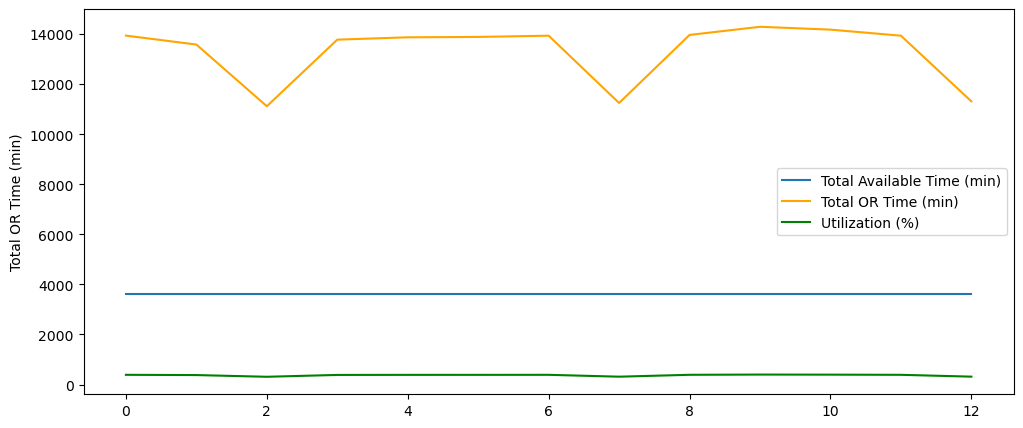

In [40]:
plt.figure(figsize=(12,5))
weekly_or_time['Total Available Time (min)'].plot()
sns.lineplot(weekly_or_time['Total OR Time (min)'], label='Total OR Time (min)', color='orange')
sns.lineplot(weekly_or_time['Utilization (%)'], label='Utilization (%)', color='green')
plt.legend()
plt.show()

### Identifying average delays and standard deviations for each stage across different procedures, specialties, and OR suites.

In [41]:
delay_stats = df.groupby(['Service', 'CPT Code', 'OR Suite']).agg(
    Average_Delay=pd.NamedAgg(column='Delay (min)', aggfunc='mean'),
    Std_Dev_Delay=pd.NamedAgg(column='Delay (min)', aggfunc='std')
).reset_index()
delay_stats

,Service,CPT Code,OR Suite,Average_Delay,Std_Dev_Delay
0,ENT,30520,5,39.000000,6.066300
1,ENT,42826,5,56.304636,24.771218
2,General,43775,8,40.500000,12.580907
3,General,47562,8,79.000000,0.000000
4,OBGYN,57460,4,51.000000,13.080001
5,OBGYN,58562,4,39.500000,16.601539
6,Ophthalmology,66982,3,7.149701,9.325369
7,Orthopedics,26045,2,82.000000,0.000000
8,Orthopedics,26356,2,124.000000,0.000000
9,Orthopedics,26735,2,108.761905,1.091089


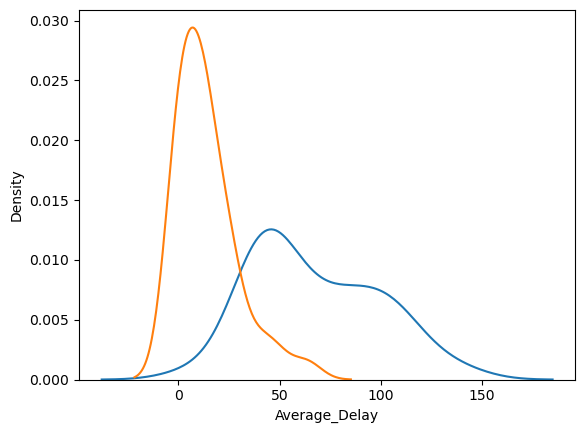

In [42]:
sns.kdeplot(delay_stats['Average_Delay'])
sns.kdeplot(delay_stats['Std_Dev_Delay'])
plt.show()

## Identifying Bottlenecks: Highlighting stages with signiﬁcant delays, indicating potential workﬂow inefﬁciencies.

### Calculating the delays for each stage

In [43]:
df['Wheels In to Start Time (min)'] = (df['Start Time'] - df['Wheels In']).dt.total_seconds() / 60
df['Start Time to End Time (min)'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 60
df['End Time to Wheels Out (min)'] = (df['Wheels Out'] - df['End Time']).dt.total_seconds() / 60

### Group by Service, CPT Code, and OR Suite and calculate mean and std deviation of delays

In [44]:
potential_delay = df.groupby(['Service', 'CPT Code', 'OR Suite']).agg(
    Avg_Delay_Wheels_In_to_Start = pd.NamedAgg(column='Wheels In to Start Time (min)', aggfunc='mean'),
    Std_Delay_Wheels_In_to_Start = pd.NamedAgg(column='Wheels In to Start Time (min)', aggfunc='std'),
    
    Avg_Delay_Start_to_End = pd.NamedAgg(column='Start Time to End Time (min)', aggfunc='mean'),
    Std_Delay_Start_to_End = pd.NamedAgg(column='Start Time to End Time (min)', aggfunc='std'),
    
    Avg_Delay_End_to_Wheels_Out = pd.NamedAgg(column='End Time to Wheels Out (min)', aggfunc='mean'),
    Std_Delay_End_to_Wheels_Out = pd.NamedAgg(column='End Time to Wheels Out (min)', aggfunc='std')
).reset_index()
potential_delay

,Service,CPT Code,OR Suite,Avg_Delay_Wheels_In_to_Start,Std_Delay_Wheels_In_to_Start,Avg_Delay_Start_to_End,Std_Delay_Start_to_End,Avg_Delay_End_to_Wheels_Out,Std_Delay_End_to_Wheels_Out
0,ENT,30520,5,21.500000,3.538675,52.500000,0.505525,12.000000,1.011050
1,ENT,42826,5,23.112583,2.112007,28.291391,2.987952,12.543046,1.753986
2,General,43775,8,20.000000,2.012945,96.000000,4.025890,13.500000,1.509709
3,General,47562,8,19.000000,0.000000,48.000000,0.000000,13.000000,0.000000
4,OBGYN,57460,4,25.000000,0.000000,33.500000,1.509231,13.500000,0.503077
5,OBGYN,58562,4,21.500000,1.509231,77.000000,0.000000,13.000000,1.006154
6,Ophthalmology,66982,3,10.823353,1.297466,16.302395,2.265062,8.745509,1.422015
7,Orthopedics,26045,2,24.000000,0.000000,56.000000,0.000000,11.904762,2.447545
8,Orthopedics,26356,2,21.000000,0.000000,47.000000,0.000000,19.000000,0.000000
9,Orthopedics,26735,2,25.761905,1.091089,84.000000,0.000000,17.000000,0.000000


### Identifying significant delays (potential bottlenecks)

### Thresholds for significant delays can be set based on domain knowledge or statistical criteria.

In [45]:
significant_delays = potential_delay[
    (potential_delay['Avg_Delay_Wheels_In_to_Start'] > 30) |  #threshold: > 30 minutes
    (potential_delay['Avg_Delay_Start_to_End'] > 50) |  #threshold: > 50 minutes
    (potential_delay['Avg_Delay_End_to_Wheels_Out'] > 30) ]  #threshold: > 30 minutes

In [46]:
print("Significant Delays (Potential Bottlenecks):")
significant_delays[['Service', 'CPT Code', 'Avg_Delay_Wheels_In_to_Start', 'Avg_Delay_Start_to_End', 'Avg_Delay_End_to_Wheels_Out']]

Significant Delays (Potential Bottlenecks):


,Service,CPT Code,Avg_Delay_Wheels_In_to_Start,Avg_Delay_Start_to_End,Avg_Delay_End_to_Wheels_Out
0,ENT,30520,21.500000,52.500000,12.000000
2,General,43775,20.000000,96.000000,13.500000
5,OBGYN,58562,21.500000,77.000000,13.000000
7,Orthopedics,26045,24.000000,56.000000,11.904762
9,Orthopedics,26735,25.761905,84.000000,17.000000
10,Orthopedics,27130,32.000000,88.000000,18.000000
11,Orthopedics,27445,36.666667,99.333333,15.500000
12,Orthopedics,27445,37.000000,83.000000,16.500000
19,Plastic,14060,22.534884,75.453488,14.023256
20,Plastic,15773,21.000000,122.000000,14.000000


The calculations reveal significant delays during various stages of the operation process, **including the time from 'Wheels In' to 'Start Time' and from 'End Time' to 'Wheels Out'.** These delays indicate potential inefficiencies that impact the overall duration of surgeries. **Identifying and addressing these bottlenecks is crucial to ensure timely operations and improve the availability of the operating room for other necessary procedures, thereby optimizing patient care and resource utilization.**

**The procedure for Orthopedics with CPT Code 27445 experienced the highest delay between the scheduled start time and wheels in, averaging approximately 37 minutes.** This delay significantly impacts the overall operation time, contributing to an extended duration of around 83 minutes. By addressing these delays and implementing necessary procedural improvements, it's possible to reduce the overall operation time and enhance efficiency.

**Create DataFrame:**

The sample DataFrame is created with all necessary columns.

**Convert date columns to datetime format for proper time calculations.**
Calculate Delays for Each Stage:

**Calculate delays between stages: Wheels In to Start Time, Start Time to End Time, and End Time to Wheels Out.**
Group by and Aggregate:

**Use groupby() to group data by Service, CPT Code, and OR Suite.**
Use agg() to calculate the average (mean) and standard deviation (std) of delays for each stage.
Identify Significant Delays:

**Define thresholds for significant delays (e.g., delays greater than 30 minutes).**
For operation (start time and end Time, mosstly the operations lying not more than 50 mins, so keep threshold for the operation is 50 min) 
**Filter the aggregated data to find stages with significant delays.**

# Analyzing Booking Time Accuracy:

### Calculating the difference between booked time and actual surgical duration

In [47]:
df['Booking vs Actual (min)'] = df['Booked Time (min)'] - df['Actual Duration (min)']

In [48]:
df[['Encounter ID', 'Service', 'CPT Code', 'Booked Time (min)', 'Actual Duration (min)', 'Booking vs Actual (min)']]

,Encounter ID,Service,CPT Code,Booked Time (min),Actual Duration (min),Booking vs Actual (min)
0,10001,Podiatry,28110,90,93.0,-3.0
1,10002,Podiatry,28055,60,48.0,12.0
2,10003,Podiatry,28297,150,22.0,128.0
3,10004,Podiatry,28296,120,57.0,63.0
4,10005,Orthopedics,27445,120,108.0,12.0
...,...,...,...,...,...,...
2167,12168,Pediatrics,69421,60,28.0,32.0
2168,12169,Pediatrics,69421,60,27.0,33.0
2169,12170,Orthopedics,27445,120,81.0,39.0
2170,12171,Orthopedics,27445,120,85.0,35.0


### Analysing the Booking vs Actual (min) with taken more than the booking Time

In [49]:
more_booking_time = df[df['Booking vs Actual (min)'] < 0]

In [50]:
more_booking_time[['Encounter ID', 'Service', 'CPT Code', 'Booked Time (min)', 'Actual Duration (min)', 'Booking vs Actual (min)']]

,Encounter ID,Service,CPT Code,Booked Time (min),Actual Duration (min),Booking vs Actual (min)
0,10001,Podiatry,28110,90,93.0,-3.0
103,10104,Podiatry,28110,90,93.0,-3.0
239,10240,Podiatry,28110,90,93.0,-3.0
343,10344,Podiatry,28110,90,93.0,-3.0
446,10447,Podiatry,28110,90,93.0,-3.0
620,10621,Podiatry,28110,90,93.0,-3.0
793,10794,Podiatry,28110,90,93.0,-3.0
897,10898,Podiatry,28110,90,93.0,-3.0
1005,11006,Podiatry,28110,90,93.0,-3.0
1143,11144,Podiatry,28110,90,93.0,-3.0


From the analysis, we observed that the booking time for surgeries is predetermined by the hospital.
Our data analysis revealed that **surgeries under the Podiatry service consistently exceed the booked time by more than 3 minutes.** 

**Podiatry, which involves the study, diagnosis, and treatment of disorders of the foot, ankle, and lower limb, requires more time for thorough evaluation.**.

This suggests that the booked times for Podiatry procedures may need adjustment to better reflect the actual time required.

# Identify Patterns: Analyze discrepancies across different procedures, specialties, or surgeons to spot consistent overbooking or underbooking trends.

### Group by Service, CPT Code, and Surgeon and calculate mean and std deviation of discrepancies

In [51]:
patterns = df.groupby(['Service', 'CPT Code']).agg(
    Avg_Discrepancy = pd.NamedAgg(column='Booking vs Actual (min)', aggfunc='mean'),
    Std_Discrepancy = pd.NamedAgg(column='Booking vs Actual (min)', aggfunc='std'),
    Count = pd.NamedAgg(column='Booking vs Actual (min)', aggfunc='count')
).reset_index()
patterns

,Service,CPT Code,Avg_Discrepancy,Std_Discrepancy,Count
0,ENT,30520,37.500000,0.505525,46
1,ENT,42826,31.708609,2.987952,151
2,General,43775,24.000000,4.025890,78
3,General,47562,42.000000,0.000000,39
4,OBGYN,57460,41.500000,1.509231,82
5,OBGYN,58562,43.000000,0.000000,82
6,Ophthalmology,66982,28.338323,2.926922,334
7,Orthopedics,26045,34.000000,0.000000,21
8,Orthopedics,26356,43.000000,0.000000,20
9,Orthopedics,26735,36.000000,0.000000,21


In [52]:
# Identify consistent trends (e.g., consistent overbooking or underbooking)
# Here, we consider consistent trends if the absolute average discrepancy is greater than a threshold (e.g., 15 minutes)

In [53]:
consistent_trends = patterns[patterns['Avg_Discrepancy'].abs() > 15]

print("Consistent Trends (Potential Overbooking/Underbooking):")
consistent_trends

Consistent Trends (Potential Overbooking/Underbooking):


,Service,CPT Code,Avg_Discrepancy,Std_Discrepancy,Count
0,ENT,30520,37.500000,0.505525,46
1,ENT,42826,31.708609,2.987952,151
2,General,43775,24.000000,4.025890,78
3,General,47562,42.000000,0.000000,39
4,OBGYN,57460,41.500000,1.509231,82
5,OBGYN,58562,43.000000,0.000000,82
6,Ophthalmology,66982,28.338323,2.926922,334
7,Orthopedics,26045,34.000000,0.000000,21
8,Orthopedics,26356,43.000000,0.000000,20
9,Orthopedics,26735,36.000000,0.000000,21


The above is the most abudant potential of the making overbooking and under booking of the services 

Lets Analyse the most Underbooking and Overbooking Consistent with the count and threshold putting under the consistent trends

**For eg: For under Booking Lets put the Threshold less than 20**

**For eg: For Over Booking Lets put the Threshold More than 60**

In [54]:
filterred =consistent_trends[(consistent_trends['Count'] < 20) | (consistent_trends['Count'] > 60)]
filterred

,Service,CPT Code,Avg_Discrepancy,Std_Discrepancy,Count
1,ENT,42826,31.708609,2.987952,151
2,General,43775,24.000000,4.025890,78
4,OBGYN,57460,41.500000,1.509231,82
5,OBGYN,58562,43.000000,0.000000,82
6,Ophthalmology,66982,28.338323,2.926922,334
11,Orthopedics,27445,29.829268,9.293307,82
12,Orthopedics,29877,25.303571,3.683025,112
14,Pediatrics,69421,32.500000,0.502865,88
15,Pediatrics,69436,28.000000,1.639214,132
16,Plastic,14060,44.546512,18.926270,86


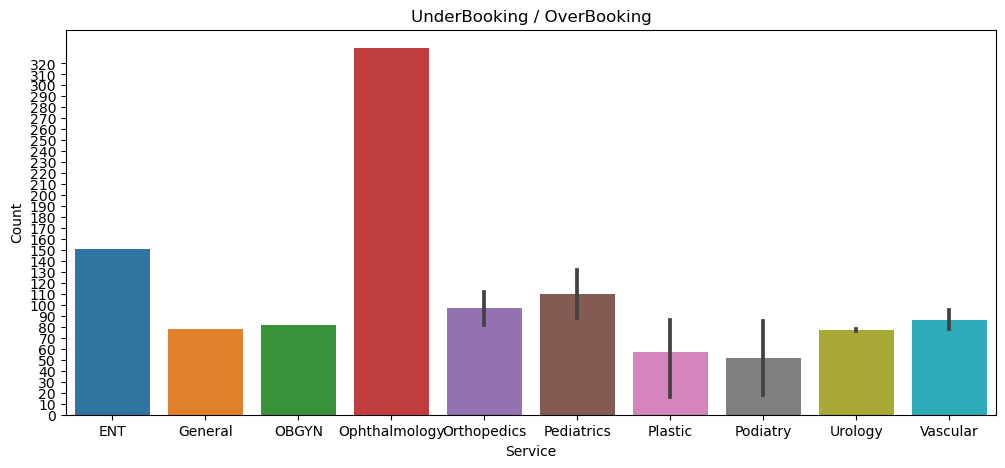

In [55]:
plt.figure(figsize=(12,5))
sns.barplot(data=filterred, x="Service", y="Count")
plt.title("UnderBooking / OverBooking")
plt.yticks(np.arange(0,330,10))
plt.show()

The analysis revealed that services with **fewer than 20 counts and more than 60 counts** tend to exhibit **underbooking and overbooking trends, respectively.**

These trends are evident in the specific services and their corresponding CPT codes.

This indicates that the booking times for these services need to be reassessed to better match the actual time requirements.

In [56]:
df[:2]

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Total OR Time (min),Delay (min),OR Exit(min),OR Enter(min),Week,Year,Wheels In to Start Time (min),Start Time to End Time (min),End Time to Wheels Out (min),Booking vs Actual (min)
0,10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,...,132.0,32.0,12.0,27.0,1,2022,27.0,93.0,12.0,-3.0
1,10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,...,84.0,88.0,11.0,25.0,1,2022,25.0,48.0,11.0,12.0


# Recommendation for Booking Adjustments: Suggest adjustments based on historical data to improve booking accuracy.`

### Review and Update Booking Times for Services

In [57]:
service_adjustments = df.groupby('Service')['Booking vs Actual (min)'].mean()

In [58]:
service_adjustments.sort_values(ascending=False)

Service
OBGYN            42.250000
Plastic          41.415459
Podiatry         33.223577
ENT              33.060914
General          30.000000
Pediatrics       29.800000
Urology          29.523316
Orthopedics      29.205607
Ophthalmology    28.338323
Vascular         23.647399
Name: Booking vs Actual (min), dtype: float64

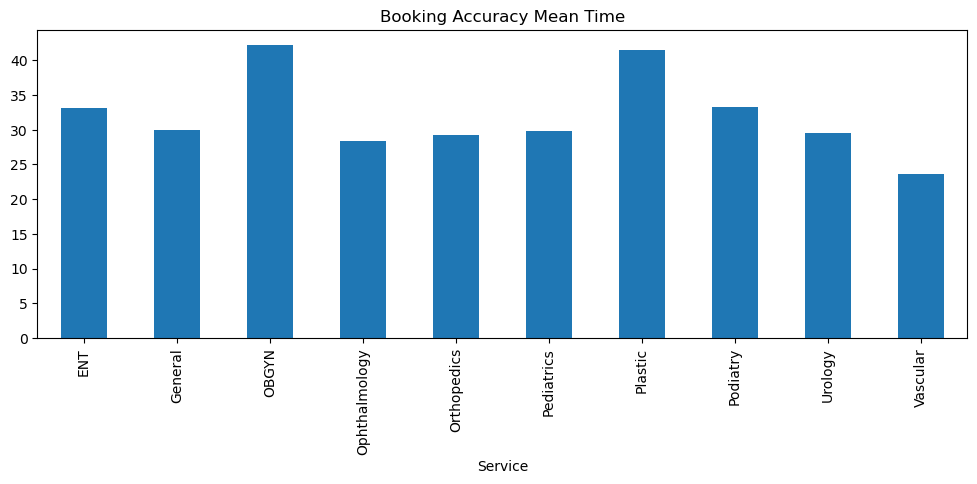

In [59]:
plt.figure(figsize=(12,4))
service_adjustments.plot(kind="bar")
plt.title("Booking Accuracy Mean Time")
plt.show()

<h2> Explaination  </h2>

We've identified services where the actual surgical durations consistently exceed the booked times, indicating a need for adjustment. **These services are experiencing delays beyond the scheduled booking times, impacting operational efficiency.**.

Adjustments to booking times for these specific services are necessary to ensure that surgeries are completed within the expected timeframe.

We analyzed the average differences between the scheduled **booking times and the actual start and end times of surgeries.**

By calculating these mean differences, we were able to adjust the booking times to improve their accuracy and better align them with the actual durations of surgeries.


Adjusting the booking times for surgeries can optimize scheduling by accommodating variations in procedure durations.

**Among the services analyzed, OBGYN has the highest average surgical duration at 42.25 minutes, followed by Plastic with an average of 41.42 minutes. In contrast, Vascular surgeries have the shortest average duration at 23.65 minutes.**
By adjusting booking times based on these averages, hospitals can better allocate time slots for surgeries and ensure efficient utilization of resources.

## Identify Cancellations: Detect procedures with missing key timestamps (e.g., no "Wheels In" time) as potential cancellations

### Identifying potential cancellations

In [60]:
potential_cancellations = df[df['Wheels In'].isna()]

print("Potential Cancellations:")
print(potential_cancellations)

Potential Cancellations:
Empty DataFrame
Columns: [Encounter ID, Date, OR Suite, Service, CPT Code, CPT Description, Booked Time (min), OR Schedule, Wheels In, Start Time, End Time, Wheels Out, Actual Duration (min), Total OR Time (min), Delay (min), OR Exit(min), OR Enter(min), Week, Year, Wheels In to Start Time (min), Start Time to End Time (min), End Time to Wheels Out (min), Booking vs Actual (min)]
Index: []

[0 rows x 23 columns]


**There is No, Wheels in time Empty to suggest and get the time for to predict the empty or the Cancellation**

## Analyze Cancellation Rates: Determine the frequency of cancellations and the amount of time booked for these procedures.

In [61]:
potential_cancellations

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Total OR Time (min),Delay (min),OR Exit(min),OR Enter(min),Week,Year,Wheels In to Start Time (min),Start Time to End Time (min),End Time to Wheels Out (min),Booking vs Actual (min)


In [62]:
cancellation_frequency = potential_cancellations.shape[0]

In [63]:
total_booked_time_cancelled = potential_cancellations['Booked Time (min)'].sum()

In [64]:
total_procedures = df.shape[0]
cancellation_rate = (cancellation_frequency / total_procedures) * 100

In [65]:
print("Cancellation Analysis:")
print(f"Number of Cancelled Procedures: {cancellation_frequency}")
print(f"Total Booked Time for Cancelled Procedures: {total_booked_time_cancelled} minutes")
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

Cancellation Analysis:
Number of Cancelled Procedures: 0
Total Booked Time for Cancelled Procedures: 0 minutes
Overall Cancellation Rate: 0.00%


<h2> Explanation: </h2>


Identifying potential cancellations:

By checking for rows where 'Wheels In' is NaT (Not a Time), you can identify procedures that potentially did not take place.

<h3>Calculating cancellation frequency:</h3>

This counts the number of cancelled procedures.

<h3> Calculating total booked time for cancelled procedures: </h3>

This sums up the booked time for all cancelled procedures.

<h3> Calculating overall cancellation rate: This calculates </h3>

The percentage of procedures that were cancelled.

**The analysis reveals that the 'Wheels In' times for the procedures show no significant delays or gaps, indicating that there were no cancellations of the procedures.**

**This suggests that all scheduled procedures commenced as planned without any significant interruptions or postponements.**

Consequently, there is no observed impact on the OR schedule due to procedure cancellations, affirming the efficiency and reliability of the current booking and scheduling process.


so the analysis came out to be the:

**Cancellation Analysis:**

**Number of Cancelled Procedures: 0**

**Total Booked Time for Cancelled Procedures: 0 minutes**

**Overall Cancellation Rate: 0.00%**


# Exploring Specialty and Procedure Variations

### Segmenting Data: Divide the dataset by surgical specialty (Service) and CPT code.

In [66]:
segments = df.groupby(['Service', 'CPT Code'])

In [67]:
for (service, cpt_code), group in segments:
    print(f"Service: {service}, CPT Code: {cpt_code}")

Service: ENT, CPT Code: 30520
Service: ENT, CPT Code: 42826
Service: General, CPT Code: 43775
Service: General, CPT Code: 47562
Service: OBGYN, CPT Code: 57460
Service: OBGYN, CPT Code: 58562
Service: Ophthalmology, CPT Code: 66982
Service: Orthopedics, CPT Code: 26045
Service: Orthopedics, CPT Code: 26356
Service: Orthopedics, CPT Code: 26735
Service: Orthopedics, CPT Code: 27130
Service: Orthopedics, CPT Code: 27445
Service: Orthopedics, CPT Code: 29877
Service: Orthopedics, CPT Code: 64721
Service: Pediatrics, CPT Code: 69421
Service: Pediatrics, CPT Code: 69436
Service: Plastic, CPT Code: 14060
Service: Plastic, CPT Code: 15773
Service: Plastic, CPT Code: 17110
Service: Plastic, CPT Code: 30400
Service: Podiatry, CPT Code: 28055
Service: Podiatry, CPT Code: 28060
Service: Podiatry, CPT Code: 28110
Service: Podiatry, CPT Code: 28285
Service: Podiatry, CPT Code: 28289
Service: Podiatry, CPT Code: 28296
Service: Podiatry, CPT Code: 28297
Service: Urology, CPT Code: 52353
Service: Urol


### For example, calculating the average booked time for each group

In [68]:
for (service, cpt_code), group in segments:
    avg_booked_time = group['Booked Time (min)'].mean()
    print(f"Service: {service}, CPT Code: {cpt_code}, Average Booked Time: {avg_booked_time} minutes")

Service: ENT, CPT Code: 30520, Average Booked Time: 90.0 minutes
Service: ENT, CPT Code: 42826, Average Booked Time: 60.0 minutes
Service: General, CPT Code: 43775, Average Booked Time: 120.0 minutes
Service: General, CPT Code: 47562, Average Booked Time: 90.0 minutes
Service: OBGYN, CPT Code: 57460, Average Booked Time: 75.0 minutes
Service: OBGYN, CPT Code: 58562, Average Booked Time: 120.0 minutes
Service: Ophthalmology, CPT Code: 66982, Average Booked Time: 44.64071856287425 minutes
Service: Orthopedics, CPT Code: 26045, Average Booked Time: 90.0 minutes
Service: Orthopedics, CPT Code: 26356, Average Booked Time: 90.0 minutes
Service: Orthopedics, CPT Code: 26735, Average Booked Time: 120.0 minutes
Service: Orthopedics, CPT Code: 27130, Average Booked Time: 120.0 minutes
Service: Orthopedics, CPT Code: 27445, Average Booked Time: 120.0 minutes
Service: Orthopedics, CPT Code: 29877, Average Booked Time: 60.0 minutes
Service: Orthopedics, CPT Code: 64721, Average Booked Time: 60.0 mi

**Group by 'Service' and 'CPT Code':**

The groupby method is used to segment the data based on 'Service' and 'CPT Code'.

**Iterate through groups:**

The code iterates through each group and prints the segmented data.
We can also perform specific analyses within this loop.

### Analyzing Workﬂow Times: Evaluate workﬂow times (e.g., average time from Wheels In to Start Time) for each specialty and procedure.

In [69]:
grouped = df.groupby(['Service', 'CPT Code'])

In [70]:
average_workflow_times = grouped['Wheels In to Start Time (min)'].mean().reset_index()

In [71]:
print("Average Workflow Times from Wheels In to Start Time:")
print("\n")
print(average_workflow_times)

Average Workflow Times from Wheels In to Start Time:


          Service  CPT Code  Wheels In to Start Time (min)
0             ENT     30520                      21.500000
1             ENT     42826                      23.112583
2         General     43775                      20.000000
3         General     47562                      19.000000
4           OBGYN     57460                      25.000000
5           OBGYN     58562                      21.500000
6   Ophthalmology     66982                      10.823353
7     Orthopedics     26045                      24.000000
8     Orthopedics     26356                      21.000000
9     Orthopedics     26735                      25.761905
10    Orthopedics     27130                      32.000000
11    Orthopedics     27445                      36.853659
12    Orthopedics     29877                      25.339286
13    Orthopedics     64721                      22.500000
14     Pediatrics     69421                      19.500000
1

<h3>Explanation:</h3>

**Calculate Workflow Time**

Compute the time difference between 'Wheels In' and 'Start Time' in minutes.
    
Group by 'Service' and 'CPT Code': Use groupby to segment the data.
    
Calculating Average Workflow Time: Compute the average workflow time for each group and reset the index for a clean DataFrame.

## Booking Accuracy: Assess the accuracy of booked times versus actual times within each segment.

In [72]:
accuracy = df.groupby(['Service', 'CPT Code'])['Booked Time (min)','Actual Duration (min)'].mean()
accuracy['Accuracy Percent'] = round((accuracy['Actual Duration (min)'] / accuracy['Booked Time (min)']) *100,2) 
accuracy['Accuracy Percent'] = accuracy['Accuracy Percent'].astype(str) +'%'
accuracy

Booked Time (min)  Actual Duration (min)  \
Service       CPT Code                                             
ENT           30520             90.000000              52.500000   
              42826             60.000000              28.291391   
General       43775            120.000000              96.000000   
              47562             90.000000              48.000000   
OBGYN         57460             75.000000              33.500000   
              58562            120.000000              77.000000   
Ophthalmology 66982             44.640719              16.302395   
Orthopedics   26045             90.000000              56.000000   
              26356             90.000000              47.000000   
              26735            120.000000              84.000000   
              27130            120.000000              88.000000   
              27445            120.000000              90.170732   
              29877             60.000000              34.696429   
              64721             60.000000              35.500000   
Pediatrics    69421             60.000000              27.500000   
              69436             60.000000              32.000000   
Plastic       14060            120.000000              75.453488   
              15773            180.000000             122.000000   
              17110             60.000000              32.666667   
              30400            120.000000              72.000000   
Podiatry      28055             60.000000              48.000000   
              28060             60.000000              34.500000   
              28110             90.000000              93.000000   
              28285             60.000000              45.000000   
              28289             60.000000              42.000000   
              28296            120.000000              77.741176   
              28297            150.000000              22.000000   
Urology       52353             60.000000              23.986842   
              55250             60.000000              34.038462   
              55873             90.000000              66.000000   
Vascular      28820             60.000000              33.000000   
              36901             75.000000              54.105263   

                       Accuracy Percent  
Service       CPT Code                   
ENT           30520              58.33%  
              42826              47.15%  
General       43775               80.0%  
              47562              53.33%  
OBGYN         57460              44.67%  
              58562              64.17%  
Ophthalmology 66982              36.52%  
Orthopedics   26045              62.22%  
              26356              52.22%  
              26735               70.0%  
              27130              73.33%  
              27445              75.14%  
              29877              57.83%  
              64721              59.17%  
Pediatrics    69421              45.83%  
              69436              53.33%  
Plastic       14060              62.88%  
              15773              67.78%  
              17110              54.44%  
              30400               60.0%  
Podiatry      28055               80.0%  
              28060               57.5%  
              28110             103.33%  
              28285               75.0%  
              28289               70.0%  
              28296              64.78%  
              28297              14.67%  
Urology       52353              39.98%  
              55250              56.73%  
              55873              73.33%  
Vascular      28820               55.0%  
              36901              72.14%

The above analysis compares the booked time for surgeries to the actual time taken.

It examines how accurately the booking times reflect the real surgery durations, considering the fixed booking times set by the hospital and the actual times spent by the surgeons in performing the surgeries.

This helps to understand the efficiency and accuracy of the scheduling process.

**For the ENT, we got the Average Accuracy is the <h3>52.5%</h3>**

**For the General, we got the Average Accuracy is the 66.5%**

**For the OBGYN, we got the Average Accuracy is the 54%**

**For the Ophthalmology, we got the Average Accuracy is the 36%**

**For the Orthopedics, we got the Average Accuracy is the 64%**

**For the Pediatrics, we got the Average Accuracy is the 49%**

**For the Plastic, we got the Average Accuracy is the 60%**

**For the Podiatry, we got the Average Accuracy is the 77%**

**For the Urology, we got the Average Accuracy is the 56%**

**For the Vascular, we got the Average Accuracy is the 63%**

From the baove analysis with the average accuracy of the solution we have find the the most minimum accuracy for the duartion taken for the surgery of the services which is belong to **Pediatrics** with the **49%** and the maximum accuacry for services beling to the **Podiatry** with the **77%**

# Key Findings and Recommendations

<h2> Workflow Analysis: </h2>

**Key Findings:**

- Significant delays were observed between "Wheels In" and "Start Time" for certain procedures.
- The "Orthopedics" service with CPT code 27445 experienced the highest average delay of approximately 37 minutes.
- Podiatry services also showed notable delays, with some procedures like Lapidus bunionectomy (CPT code 28297) having a significant deviation from booked times.

**Recommendations:**
- Implement a streamlined check-in process to reduce delays between "Wheels In" and "Start Time".
- Introduce a preoperative readiness checklist to ensure that all necessary preparations are completed before the patient is wheeled in.
- Regularly review and adjust the scheduled start times based on historical data to better match actual workflow patterns.

<h2> 2. Overall Utilization: </h2>

**Key Findings:**
- The overall utilization rates varied significantly across different weeks, indicating fluctuations in OR efficiency.
- Some weeks showed underutilization, suggesting potential for scheduling more procedures without compromising quality of care.

**Recommendations:**
- Increase the flexibility of scheduling to better match supply and demand, potentially by implementing a dynamic scheduling system.
- Use historical utilization data to forecast and adjust future booking slots to optimize OR usage.

<h2> 3. Booking Time Accuracy: </h2>

**Key Findings:**
- Podiatry services generally required more time than what was booked, with an average discrepancy of over 3 minutes.
- The highest average overbooking was observed in the OBGYN services, while the lowest underbooking occurred in Vascular services.

**Recommendations:**
- Adjust booking times for services that consistently run over or under their scheduled durations based on historical data.
- Implement a feedback loop where surgeons can provide input on expected surgery times, which can then be used to fine-tune the booking system.
- Consider scheduling buffer times for services that have highly variable durations to account for unexpected delays.

<h2> 4. Cancellation Rates: </h2>

**Key Findings:**
- No significant cancellations were detected in the provided data, as indicated by the presence of key timestamps for all procedures.

**Recommendations:**
- Maintain the current scheduling and preparation processes that seem to effectively minimize cancellations.
- Continue monitoring for cancellations and address any emerging patterns that might indicate potential issues.

<h2> 5. Accuracy of Booked Times: </h2>

**Key Findings:**
- The accuracy of booked times versus actual surgery times showed variability across different specialties and procedures.
- Services with less than 20 or more than 60 bookings per period demonstrated trends of underbooking or overbooking, respectively.

**Recommendations:**
- Reevaluate the standard booked times for procedures with significant discrepancies to better align them with actual durations.
- For services with consistently inaccurate bookings, consider detailed time studies to understand the causes of variability and adjust accordingly.

### Summary
The comprehensive analysis has identified key areas where the current scheduling and operational processes can be improved to enhance OR efficiency and accuracy. By addressing delays, optimizing utilization, improving booking accuracy, and minimizing cancellations, the overall performance of the surgical services can be significantly enhanced. Implementing the recommended adjustments based on these findings will help in creating a more efficient and patient-centered surgical workflow.